In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Ruta al directorio raíz del repo (dos niveles hacia arriba desde experiments/BS)
repo_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

# Agregar el root al sys.path si no está
if repo_root not in sys.path:
    sys.path.append(repo_root)

from src.dynamics import stoch_dyn_BS

In [2]:
dt = 1/252
mu = 0.05
sigma = 0.2

def simulate_both_BS(S0=100, T=10, dt=1/252):
    N = int(T / dt)
    t = np.linspace(0, T, N + 1)

    # Mismo ruido para ambas simulaciones
    Z = np.random.randn(N)

    S_scheme = np.zeros(N + 1)
    S_exact  = np.zeros(N + 1)
    S_scheme[0] = S_exact[0] = S0

    W = 0.0  # Browniano acumulado

    for k in range(N):
        z = Z[k]
        # Esquema Euler–Maruyama usando tu función
        [S_scheme[k+1], _, _] = stoch_dyn_BS([S_scheme[k], z])

        # Actualizo W y uso la fórmula exacta de BS
        W += np.sqrt(dt) * z
        t_next = t[k+1]
        S_exact[k+1] = S0 * np.exp((mu - 0.5 * sigma**2) * t_next + sigma * W)

    return t, S_scheme, S_exact

C:\Users\Javier\AppData\Local\Temp\ipykernel_13764\3604957663.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [S_scheme[k+1], _, _] = stoch_dyn_BS([S_scheme[k], z])


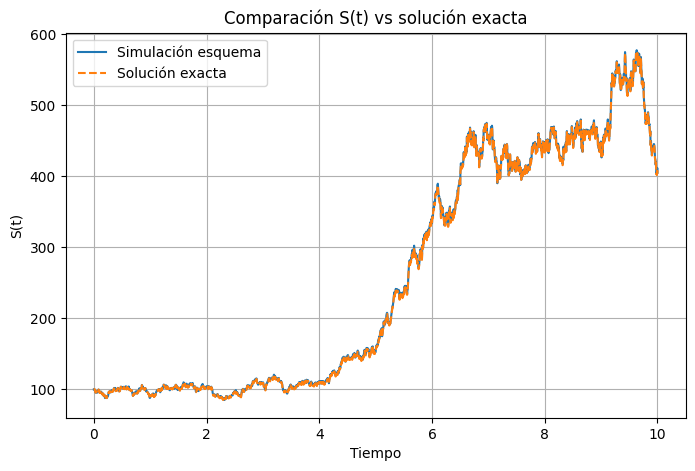

In [3]:
# Simulación y gráficos
t, S_scheme, S_exact = simulate_both_BS(S0=100, T=10, dt=dt)

plt.figure(figsize=(8, 5))
plt.plot(t, S_scheme, label="Simulación esquema")
plt.plot(t, S_exact, "--", label="Solución exacta")
plt.xlabel("Tiempo")
plt.ylabel("S(t)")
plt.title("Comparación S(t) vs solución exacta")
plt.legend()
plt.grid(True)
plt.show()
